In [805]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.utils import shuffle


# Présentation du data set

In [806]:
rawData = pd.read_csv("dataset/athlete_events.csv")

rawData.describe()

rawData.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Les variables


- ID : Identifiant unique pour chacun des athlètes
- Name : Nom de l'athlète
- Sex : Sexe de l'athlète (M ou F)
- Age : Age de l'athlète
- Height : Taille en centimètre de l'athlète
- Weight : Poids en kilogrammes de l'athlète
- Team : Nomm de l'équipe de l'athlète
- NOC : Identifiant en trois lettre des équipes
- Games : Année et saison des JO
- Year : Année de participation
- Season : "Summer" ou "Winter"
- City : Ville hôte
- Sport : Sport de l'épreuve
- Event : Nom e l'évènement
- Medal : Type de médaille remporté : Gold, Silver, Bronze, ou NA si rien n'a été gagné par l'athlète

### Variables utlisées dans le cadre de la résolution de la problématique
Les variables qui seront utlisées dans le cadre de la résolution de la problématique seront :
- Age
- Height
- Weight

Qui permettent de décrire physiquement l'athlète

- Sport

Pour catégoriser les athlètes

- Medal


Pour évaluer la réussite de l'athlète


### Descriptions graphiques des variables

#### Taille / Poids / Age

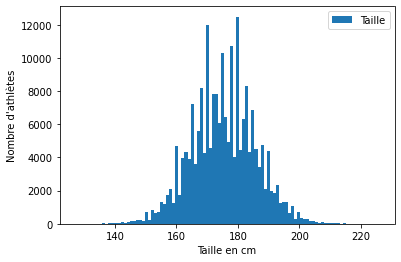

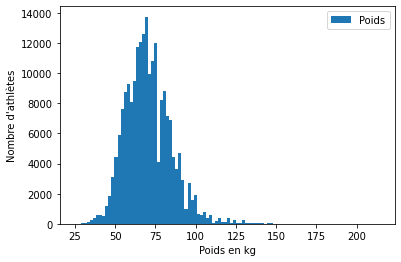

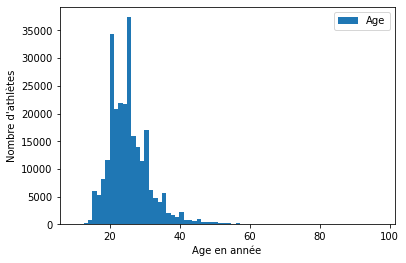

In [807]:
plt.hist(rawData["Height"], bins=100, label=['Taille'])
plt.legend(loc="upper right")
plt.xlabel('Taille en cm')
plt.ylabel("Nombre d'athlètes")
plt.show()

plt.hist(rawData["Weight"], bins=100, label=['Poids'])
plt.legend(loc="upper right")
plt.xlabel('Poids en kg')
plt.ylabel("Nombre d'athlètes")
plt.show()

plt.hist(rawData["Age"], bins=70, label=['Age'])
plt.legend(loc="upper right")
plt.xlabel('Age en année')
plt.ylabel("Nombre d'athlètes")
plt.show()

# Nettoyage des données

Données qu'on considère comme ne pouvant pas être null à cause :

**Du non sens physique**
 - Age
 - Height
 - Weight
 - Sex


**Pour les besoins du process de traitement**
 - Sport

In [808]:
rawData.isnull()

print("Taille pré nettoyage :" + str(len(rawData)))

# Suppression des colonnes inutiles
rawData = rawData.drop(["Name", "Team", "NOC", "Games", "Year", "Season", "City", "Event"], axis=1)

# Filtre sur les data null
clearData = rawData[(rawData["Height"].isnull() == False) & \
                    (rawData["Age"].isnull() == False) & \
                    (rawData["Weight"].isnull() == False) & \
                    (rawData["Sex"].isnull() == False) & \
                    (rawData["Sport"].isnull() == False)
                    ]
print("Taille post nettoyage :" + str(len(clearData)))
print("Il y'a donc une perte de " + str(len(rawData) - len(clearData)))
clearData.head()

Taille pré nettoyage :271116
Taille post nettoyage :206165
Il y'a donc une perte de 64951


,ID,Sex,Age,Height,Weight,Sport,Medal
0,1,M,24.0,180.0,80.0,Basketball,NaN
1,2,M,23.0,170.0,60.0,Judo,NaN
4,5,F,21.0,185.0,82.0,Speed Skating,NaN
5,5,F,21.0,185.0,82.0,Speed Skating,NaN
6,5,F,25.0,185.0,82.0,Speed Skating,NaN


# Normalisation des données

## Normalisation Taille / Poids / Age

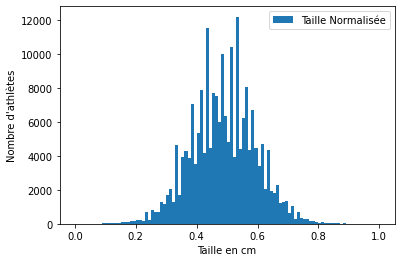

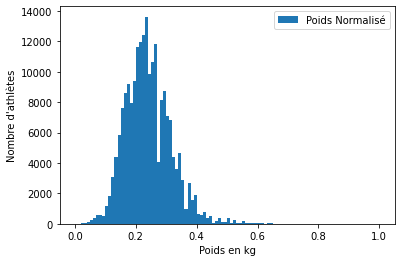

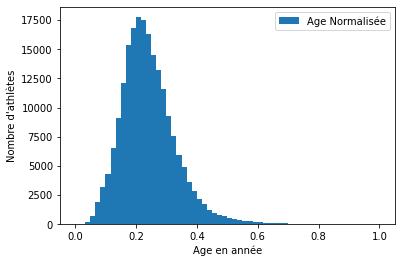

In [809]:
#normalisation de l'age 
clearData = clearData.copy()
data_age = clearData["Age"].copy()
min_age = (data_age-data_age.min())
max_age = (data_age.max()-data_age.min())
res = (min_age)/(max_age)*1
clearData["Age"] = res

#normalisation du poids
clearData = clearData.copy()
data_age = clearData["Weight"].copy()
min_age = (data_age-data_age.min())
max_age = (data_age.max()-data_age.min())
res = (min_age)/(max_age)*1
clearData["Weight"] = res

#normalisation de la taille
clearData = clearData.copy()
data_age = clearData["Height"].copy()
min_age = (data_age-data_age.min())
max_age = (data_age.max()-data_age.min())
res = (min_age)/(max_age)*1
clearData["Height"] = res



plt.hist(clearData["Height"], bins=100, label=['Taille Normalisée'])
plt.legend(loc="upper right")
plt.xlabel('Taille en cm')
plt.ylabel("Nombre d'athlètes")
plt.show()

plt.hist(clearData["Weight"], bins=100, label=['Poids Normalisé'])
plt.legend(loc="upper right")
plt.xlabel('Poids en kg')
plt.ylabel("Nombre d'athlètes")
plt.show()

plt.hist(clearData["Age"], bins=60, label=['Age Normalisée'])
plt.legend(loc="upper right")
plt.xlabel('Age en année')
plt.ylabel("Nombre d'athlètes")
plt.show()


# Encodage des valeurs non numériques

In [810]:
clearData.loc[(clearData["Medal"].isnull() == False), 'Medal'] = 1
clearData.loc[(clearData["Medal"].isnull() == True), 'Medal'] = 0

clearData.loc[(clearData["Sex"]== "M"), 'Sex'] = 1
clearData.loc[(clearData["Sex"]== "F"), 'Sex'] = 0


# Etude de la donnée

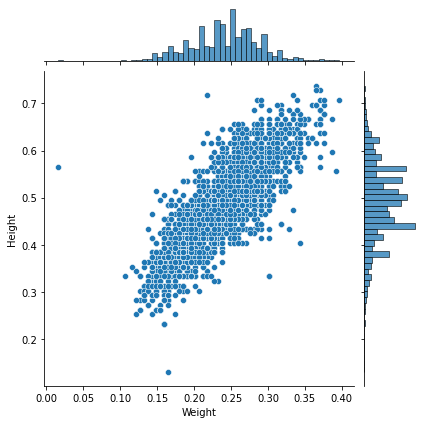

In [811]:

#on observe taile et poids
taille_poids=clearData.loc[(clearData["Sport"]=="Football"), ['Height',"Weight"]] 

sns.jointplot(x=taille_poids["Weight"],y=taille_poids["Height"])


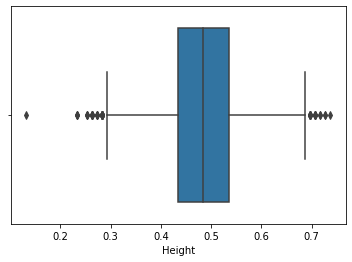

<AxesSubplot:xlabel='Weight'>

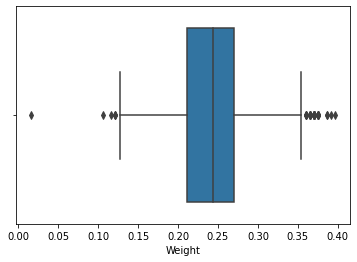

In [812]:

sns.boxplot(x=taille_poids["Height"])
plt.show()
sns.boxplot(x=taille_poids["Weight"])

In [813]:
# clearData.loc[(clearData["Height"].min() )] 

# clearData = clearData[min(clearData["Height"]) ]


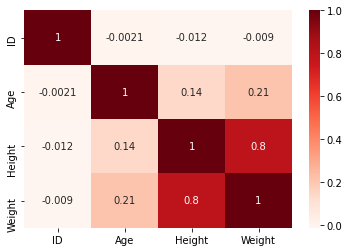

In [814]:
cor = clearData.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [815]:
#on recup les events de football
foot=clearData.loc[(clearData["Sport"]=="Judo")]
foot=foot.drop(["Sport"], axis=1)
foot=foot.drop(["ID"], axis=1)

footwins=foot.loc[(foot["Medal"]==1)] 
footwins


,Sex,Age,Height,Weight,Medal
1490,1,0.166667,0.515152,0.280423,1
1491,1,0.233333,0.515152,0.280423,1
2044,0,0.200000,0.373737,0.216931,1
4555,1,0.216667,0.434343,0.253968,1
4556,1,0.283333,0.434343,0.253968,1
...,...,...,...,...,...
269541,0,0.200000,0.464646,0.386243,1
270304,0,0.183333,0.464646,0.206349,1
270306,0,0.316667,0.464646,0.206349,1
270981,1,0.200000,0.555556,0.343915,1


In [816]:
footL=foot.loc[(foot["Medal"]==0)] 
footL=footL.sample(526)
# footL.reset_index()
foot=pd.concat([footL,footwins])
foot = shuffle(foot)
# foot.shape

# foot.drop(foot[foot.Height.min].index, inplace=True)


# foot.drop(min(["Height"]), axis=1)
# print(res)
# # sns.boxplot(x=foot["Height"])
# # plt.show()

# foot.drop(min(["Weight"]), axis=1)
# # sns.boxplot(x=foot["Weight"])
# # plt.show()
# # foot.head()

foot.shape

(1052, 5)

In [817]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

reglog = LogisticRegression(solver="lbfgs", penalty="none", max_iter=300)

X = foot.drop(["Medal"], axis=1)
Y = foot["Medal"].astype(int)

print(X.shape)
print(Y.shape)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, train_size=0.8, random_state=42)


reglog = reglog.fit(X_train, Y_train)

print('Coefficients: ', reglog.coef_)

predicted_classes = reglog.predict(X_test)
accuracy = accuracy_score(Y_test,predicted_classes)

print('Accuracy (%): ', accuracy * 100)

print(classification_report(Y_test,predicted_classes))

(1052, 4)
(1052,)
Coefficients:  [[-0.50781135 -0.43793978 -0.47035518  1.99722418]]
Accuracy (%):  52.13270142180095
              precision    recall  f1-score   support

           0       0.57      0.56      0.56       116
           1       0.47      0.47      0.47        95

    accuracy                           0.52       211
   macro avg       0.52      0.52      0.52       211
weighted avg       0.52      0.52      0.52       211



In [818]:
# cor = clearData.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [819]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# classifier.fit(X_train, Y_train) # On peut mettre Y_train ou Y_train_lb. Pourquoi ?


# from sklearn.metrics import classification_report, accuracy_score

# predicted_classes = classifier.predict(X_test)
# accuracy = accuracy_score(Y_test,predicted_classes)

# print('Accuracy (%): ', accuracy * 100)

# print(classification_report(Y_test,predicted_classes))

In [820]:
# X = clearData["Sport"].tolist()

# label_encoder = LabelEncoder()
# X_labels = label_encoder.fit_transform("|".join(X).split("|"))

# clearData["Sport"] = X_labels
# clearData.head(15)

In [821]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score

# lenCD = len(clearData[clearData.Medal == 1])

# sampleData = pd.concat([clearData[clearData.Medal == 1], clearData[clearData.Medal == 0].sample(lenCD)])

# reglog = LogisticRegression(solver="lbfgs", penalty="none", max_iter=300)

# X = sampleData.drop(["Medal"], axis=1)
# Y = sampleData["Medal"].astype(int)

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, train_size=0.8, random_state=42)


# reglog = reglog.fit(X_train, Y_train)

# print('Coefficients: ', reglog.coef_)

# predicted_classes = reglog.predict(X_test)
# accuracy = accuracy_score(Y_test,predicted_classes)

# print('Accuracy (%): ', accuracy * 100)

# print(classification_report(Y_test,predicted_classes))